<a href="https://colab.research.google.com/github/AtheeshV/work/blob/main/DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

#Uploading Kaggle API credentials JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atheesh1","key":"c0b3270f88a0c1b12e90602b69b45bc5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tr1gg3rtrash/balanced-augmented-covid-cxr-dataset

balanced-augmented-covid-cxr-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip balanced-augmented-covid-cxr-dataset.zip -d balanced-augmented-covid-cxr-dataset

Archive:  balanced-augmented-covid-cxr-dataset.zip
replace balanced-augmented-covid-cxr-dataset/COVID/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
import matplotlib.pylab as plt

covid_folder = '/content/balanced-augmented-covid-cxr-dataset/COVID/'
normal_folder = '/content/balanced-augmented-covid-cxr-dataset/Normal/'
opaque_folder = '/content/balanced-augmented-covid-cxr-dataset/Lung opacity/'
pneumonia_folder = '/content/balanced-augmented-covid-cxr-dataset/Viral Pneumonia'

# Lists to store images and labels
images = []
labels = []

# Loading and preprocess Covid images
for filename in os.listdir(covid_folder):
    if filename.endswith('.png'):
      img = cv2.imread(os.path.join(covid_folder, filename))
      img = cv2.resize(img, (128, 128)) # resize the image to a common size
      images.append(img)
      labels.append(0) # 0 represents covid

#loading and preprocess normal image
for filename in os.listdir(normal_folder):
    if filename.endswith('.png'):
      img = cv2.imread(os.path.join(normal_folder, filename))
      img = cv2.resize(img, (128, 128)) # resize the image to a common size
      images.append(img)
      labels.append(1) # 1 represents normal

#loading and preprocess lung opacity image
for filename in os.listdir(opaque_folder):
    if filename.endswith('.png'):
      img = cv2.imread(os.path.join(opaque_folder, filename))
      img = cv2.resize(img, (128, 128)) # resize the image to a common size
      images.append(img)
      labels.append(2) # 2 represents lung opacity

#loading and preprocess viral pneumonia image
for filename in os.listdir(pneumonia_folder):
    if filename.endswith('.png'):
      img = cv2.imread(os.path.join(pneumonia_folder, filename))
      img = cv2.resize(img, (128, 128)) # resize the image to a common size
      images.append(img)
      labels.append(3) # 3 represents viral pneumonia


# convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
if len(labels) == 0:
    print("List is empty")

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Model creation
model = keras. Sequential([
layers. Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), layers. MaxPooling2D((2, 2)), # input layers we used is 32
layers. Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D( (2, 2)),
layers. Flatten(),
layers. Dense(64, activation='relu'),
layers. Dense(4, activation='softmax')
#4 classes: covid, normal, opacity and viral (we have covid, normal, opacity and viral so we only have to output)
])

#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
#Check the image shape

print(x1_train.shape)
print(y1_train.shape)

(23998, 128, 128, 3)
(23998,)


In [ ]:
#train the model

history1 = model.fit(x1_train, y1_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
600/600 [==============================] - 441s 732ms/step - loss: 3.7698 - accuracy: 0.7285 - val_loss: 0.4195 - val_accuracy: 0.8402
Epoch 2/10
600/600 [==============================] - 446s 744ms/step - loss: 0.3457 - accuracy: 0.8749 - val_loss: 0.3458 - val_accuracy: 0.8725
Epoch 3/10
600/600 [==============================] - 445s 741ms/step - loss: 0.1993 - accuracy: 0.9299 - val_loss: 0.3064 - val_accuracy: 0.8956
Epoch 4/10
600/600 [==============================] - 445s 741ms/step - loss: 0.4647 - accuracy: 0.8722 - val_loss: 0.8638 - val_accuracy: 0.6450
Epoch 5/10
600/600 [==============================] - 435s 725ms/step - loss: 0.5445 - accuracy: 0.7893 - val_loss: 0.5838 - val_accuracy: 0.7981
Epoch 6/10
600/600 [==============================] - 451s 752ms/step - loss: 0.2795 - accuracy: 0.9014 - val_loss: 0.4200 - val_accuracy: 0.8687
Epoch 7/10
600/600 [==============================] - 436s 726ms/step - loss: 0.1623 - accuracy: 0.9438 - val_loss: 0.3321 -

In [ ]:
# Testing process after we finish training

# Model Evaluation:
test_loss, test_acc = model.evaluate(x1_test, y1_test, verbose=2)
print(f'Test accuracy: {test_acc}')

188/188 - 36s - loss: 1.1900 - accuracy: 0.7208 - 36s/epoch - 189ms/step
Test accuracy: 0.7208333611488342


In [ ]:
#Predicting on a single image

sample_image = x1_test[5] #Replace with another image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

#We can interpret the label using our database's class labels
#(0 for covid, 1 for normal, 2 for Lung Opacity and 3 for Viral Pneumonia)
class_labels =['covid','normal','opacity','pneumonia']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 201ms/step
Predicted class: covid


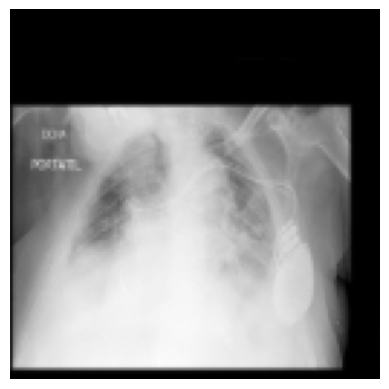

In [ ]:
import matplotlib.pyplot as plt

#Sample image
plt.imshow(sample_image)
plt.axis('off') #Turn off axis labels and ticks
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities on the test set
y1_pred_prob = model.predict(x1_test)

# Convert probabilities to class labels
y1_pred = np.argmax(y1_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y1_test, y1_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y1_test, y1_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y1_test, y1_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(conf_matrix)

188/188 [==============================] - 37s 195ms/step
Accuracy: 0.7208333333333333
Precision: 0.7315675608741112
Recall: 0.7208333333333333
F1 Score: 0.7180081390477532
Confusion Matrix:
[[1486  129   85   37]
 [ 301 1101  212   81]
 [ 402  201  872   42]
 [ 138   35   12  866]]


In [ ]:
uploaded_image = uploaded_image.astype('float32')/255.0
uploaded_image = np.expand_dims(uploaded_image, )

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the FCN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # Output layer with 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 128)      

In [ ]:
# Model Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

188/188 - 53s - loss: 0.1771 - accuracy: 0.9525 - 53s/epoch - 280ms/step
Test accuracy: 0.9524999856948853


In [ ]:
# Example: Predicting on a single image
sample_image = x_test[5]  # Replace with your image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 164ms/step


In [ ]:
# Label interpretation using class labels
class_labels = ['covid', 'normal', 'opacity', 'pneumonia']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

Predicted class: covid


In [ ]:
# Display the sample image
import matplotlib.pyplot as plt

plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities on the test set
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

188/188 [==============================] - 54s 287ms/step
Accuracy: 0.9525
Precision: 0.952656235584516
Recall: 0.9525
F1 Score: 0.9522833837060101
Confusion Matrix:
[[1702   16   12    7]
 [  29 1606   49   11]
 [  46  102 1366    3]
 [   0   10    0 1041]]
